# Data Preparation

## Imports

In [69]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_categories', 500)

import warnings
warnings.filterwarnings('ignore')

In [70]:
# source: https://paleobiodb.org/classic/displayDownloadGenerator
measurements = pd.read_csv('/Users/landise/Documents/SI 671 Data Mining/final_proj/measurements.csv')
specimens = pd.read_csv('/Users/landise/Documents/SI 671 Data Mining/final_proj/bones.csv')

In [71]:
# source: https://data.world/bryon/paleobiodb
paleodb = pd.read_csv('/Users/landise/Documents/SI 671 Data Mining/final_proj/bryon-paleobiodb/pbdb_data.csv')
# see other document for exploration of this dataset; may need to reference it later

In [72]:
print(f"There are {measurements.shape[0]} measurement records.")
print(f"There are {specimens.shape[0]} specimen records.")

There are 3512 measurement records.
There are 2668 specimen records.


## Data Preparation Part 1: Select and concatenate columns

In [73]:
measurements.head()

,measurement_no,specimen_no,record_type,n_measured,position,measurement_type,average,min,max
0,26382,13134,mea,1,NaN,length,0.137,NaN,NaN
1,36186,18564,mea,1,NaN,length,207.000,NaN,NaN
2,36187,18564,mea,1,NaN,circumference,47.000,NaN,NaN
3,36188,18565,mea,1,NaN,length,551.000,NaN,NaN
4,36189,18565,mea,1,NaN,circumference,185.000,NaN,NaN


MEASUREMENT Columns:
* `measurement_no` - a unique value for each record
* `specimen_no` - 2668 unique values (which matches the size of the specimen table)
* `record_type` - all 'mea' in this table; **drop this column**
* `n_measured` - mostly 1; **drop this column**
* `position` - mostly missing; **drop this column**
* `measurement_type` - length, width, circumference, diameter, height
* `average` - the average measured value, or the single value if only one item was measured
* `min` - mostly missing; **drop this column**
* `max` - mostly missing; **drop this column**

Source: https://paleobiodb.org/data1.2/specs/measurements_doc.html

In [74]:
specimens.head()

,specimen_no,record_type,flags,occurrence_no,reid_no,collection_no,specimen_id,is_type,specelt_no,specimen_side,specimen_part,specimen_sex,n_measured,measurement_source,magnification,comments,identified_name,identified_rank,identified_no,difference,accepted_name,accepted_rank,accepted_no,max_ma,min_ma,reference_no
0,13134,spm,NaN,489976.0,19690,49415.0,MUCPv 323,holotype,NaN,right,pubis,NaN,1,text,NaN,NaN,Futalognkosaurus dukei,species,109005,NaN,Futalognkosaurus dukei,species,109005,93.5,85.8,25429
1,18564,spm,N,NaN,0,NaN,AMNH 2704,NaN,NaN,NaN,femur,NaN,1,table,NaN,NaN,Coelophysis bauri,species,55477,NaN,Coelophysis bauri,species,54212,NaN,NaN,34423
2,18565,spm,N,NaN,0,NaN,UCMP 37302,NaN,NaN,NaN,femur,NaN,1,table,NaN,NaN,Dilophosaurus wetherilli,species,57251,NaN,Dilophosaurus wetherilli,species,55479,NaN,NaN,34423
3,18566,spm,N,NaN,0,NaN,UCMP 37302,NaN,NaN,NaN,tibia,NaN,1,table,NaN,NaN,Dilophosaurus wetherilli,species,57251,NaN,Dilophosaurus wetherilli,species,55479,NaN,NaN,34423
4,18567,spm,N,NaN,0,NaN,UCMP 37302,NaN,NaN,NaN,fibula,NaN,1,table,NaN,NaN,Dilophosaurus wetherilli,species,57251,NaN,Dilophosaurus wetherilli,species,55479,NaN,NaN,34423


SPECIMEN Columns:

* `specimen_no` - a unique value for each record
* `record_type` - all 'spm' in this dataset; **drop this column**
* `flags` - all 'N' or NaN (N means his specimen is not associated with an occurrence.)
* `occurrence_no` - identifier of the occurrence, if any
* `reid_no` - if the associated occurrence was reidentified, a unique identifier for the reidentification
* `collection_no` - identifier of the collection, if any, with which the specimen is associated
* `specimen_id` - the identifier for this specimen according to its custodial institution; **drop this column**
* `is_type` - holotype (the specimen that is found and first described to have this name) or paratype (additional specimens that are added to the description at the original time of description)
* `specelt_no` - all NaN; **drop this column**
* `specimen_side` - left, right, both
* `specimen_part` - which bone
* `specimen_sex` - all NaN; **drop this column**
* `n_measured` - mostly 1; **drop this column**
* `measurement_source` - how the measurements were obtained, if known (text, table, picture, graph) **drop this column**
* `magnification` - magnification used in the measurement, if known **drop this column**
* `comments` - too detailed; **drop this column**
* `identified_name` - The taxonomic name by which this occurrence was identified. This field will be omitted for responses in the compact voabulary if it is identical to the value of accepted_name.
* `identified_rank` - species, genus, family, subfamily, or unranked clade
* `identified_no` - The unique identifier of the identified taxonomic name. If this is empty, then the name was never entered into the taxonomic hierarchy stored in this database and we have no further information about the classification of this occurrence. In some cases, the genus has been entered into the taxonomic hierarchy but not the species. This field will be omitted for responses in the compact voabulary if it is identical to the value of accepted_no.
* `difference` - If the identified name is different from the accepted name, this field gives the reason why. This field will be present if, for example, the identified name is a junior synonym or nomen dubium, or if the species has been recombined, or if the identification is misspelled.
* `accepted_name` - The value of this field will be the accepted taxonomic name corresponding to the identified name.
* `accepted_rank` - species, genus, unranked clade, family, subfamily, infraorder, suborder
* `accepted_no` - The unique identifier of the accepted taxonomic name in this database.
* `max_ma` - The early bound of the geologic time range associated with this occurrence (in Ma)
* `min_ma` - The late bound of the geologic time range associated with this occurrence (in Ma)
* `reference_no` - The identifier of the reference from which this data was entered

Source: https://paleobiodb.org/data1.2/specs/measurements_doc.html

In [75]:
# drop unneeded columns

measurements = measurements.drop(['record_type', 'n_measured', 'position', 'min', 'max'], axis=1)
specimens = specimens.drop(['record_type', 'flags', 'specimen_id', 'specelt_no', 'specimen_sex', 'n_measured', 'measurement_source', 'magnification', 'comments', 'identified_rank', 'accepted_rank'], axis=1)

In [76]:
# create one df with all info
# left df is measurements, which will have some repeated specimens, for example, specimen_no 18564 is a femur from a Coelophysis with length and circumference measurements

print('The shape of the measurements dataframe is ', measurements.shape)
print('The shape of the specimens dataframe is ', specimens.shape)

print('\n')
df = pd.merge(measurements, specimens, how='left', on='specimen_no')
print('The shape of the merged dataframe is ', df.shape)
df.head()

The shape of the measurements dataframe is  (3512, 4)
The shape of the specimens dataframe is  (2668, 15)


The shape of the merged dataframe is  (3512, 18)


,measurement_no,specimen_no,measurement_type,average,occurrence_no,reid_no,collection_no,is_type,specimen_side,specimen_part,identified_name,identified_no,difference,accepted_name,accepted_no,max_ma,min_ma,reference_no
0,26382,13134,length,0.137,489976.0,19690,49415.0,holotype,right,pubis,Futalognkosaurus dukei,109005,NaN,Futalognkosaurus dukei,109005,93.5,85.8,25429
1,36186,18564,length,207.000,NaN,0,NaN,NaN,NaN,femur,Coelophysis bauri,55477,NaN,Coelophysis bauri,54212,NaN,NaN,34423
2,36187,18564,circumference,47.000,NaN,0,NaN,NaN,NaN,femur,Coelophysis bauri,55477,NaN,Coelophysis bauri,54212,NaN,NaN,34423
3,36188,18565,length,551.000,NaN,0,NaN,NaN,NaN,femur,Dilophosaurus wetherilli,57251,NaN,Dilophosaurus wetherilli,55479,NaN,NaN,34423
4,36189,18565,circumference,185.000,NaN,0,NaN,NaN,NaN,femur,Dilophosaurus wetherilli,57251,NaN,Dilophosaurus wetherilli,55479,NaN,NaN,34423


Would like to get the following info from the `paleodb` dataframe:

1. phylum
2. class
3. order
4. family
5. genus
6. diet

In [77]:
# seems like we can match on paleodb.accepted_name and the first word of df.accepted_name
# create a new attribute to match

df['accepted_name_truncated'] = df.apply(lambda row: row.accepted_name.split()[0], axis=1)
df['identified_name_truncated'] = df.apply(lambda row: row.identified_name.split()[0], axis=1)

paleodb_merge = paleodb[['accepted_name', 'phylum', 'class', 'order', 'family', 'genus', 'diet']]


In [78]:
# drop duplicate rows

print(paleodb_merge.shape)
paleodb_merge = paleodb_merge.drop_duplicates()
print(paleodb_merge.shape)

(970505, 7)
(59353, 7)


In [79]:
# see if there are any duplicate accepted names in this dataframe

paleodb_merge_accepted_names_value_counts = pd.DataFrame(columns=['accepted_name', 'frequency'])
paleodb_merge_accepted_names_value_counts['accepted_name'] = paleodb_merge.accepted_name.value_counts().index
paleodb_merge_accepted_names_value_counts['frequency'] = paleodb_merge.accepted_name.value_counts().values

In [80]:
# isolate accepted names with duplicate entries

dupes = paleodb_merge_accepted_names_value_counts[paleodb_merge_accepted_names_value_counts['frequency']!=1]
dupes.shape

(204, 2)

In [81]:
# see if any of the duplicates in the paleodb df are going to affect our merge

dino_accepted_names = set(df.accepted_name_truncated.value_counts().index)
duplicate_accepted_names = set(dupes.accepted_name.value_counts().index)

dino_accepted_names.intersection(duplicate_accepted_names)

{'Stormbergia'}

In [82]:
# look at the duplicate accepted_name

paleodb_merge[paleodb_merge.accepted_name=='Stormbergia']

,accepted_name,phylum,class,order,family,genus,diet
222251,Stormbergia,NaN,NaN,NaN,NaN,Stormbergia,NaN
371755,Stormbergia,Chordata,Ornithischia,NaN,NaN,Stormbergia,herbivore


In [83]:
# drop the row with less information

paleodb_merge = paleodb_merge.drop(labels=222251)

In [84]:
print('The dinosaur dataframe has shape ', df.shape)
df_accepted = pd.merge(df, paleodb_merge, how='left', left_on='accepted_name_truncated', right_on='accepted_name', indicator=True)
print('The dataframe that was made using the accepted name has shape ', df_accepted.shape)
df_identified = pd.merge(df, paleodb_merge, how='left', left_on='identified_name_truncated', right_on='accepted_name', indicator=True)
print('The dataframe that was made using the identified name has shape ', df_identified.shape)

The dinosaur dataframe has shape  (3512, 20)
The dataframe that was made using the accepted name has shape  (3512, 28)
The dataframe that was made using the identified name has shape  (3512, 28)


In [85]:
print(df_accepted._merge.value_counts())
print(df_identified._merge.value_counts())

# there are some names in both dataframes that did not match
# there are more matches for df_accepted, so use this one

both          3360
left_only      152
right_only       0
Name: _merge, dtype: int64
both          3239
left_only      273
right_only       0
Name: _merge, dtype: int64


In [86]:
# peek at the accepted names without a match

df_accepted[df_accepted['_merge']=='left_only'].sample(20)

,measurement_no,specimen_no,measurement_type,average,occurrence_no,reid_no,collection_no,is_type,specimen_side,specimen_part,identified_name,identified_no,difference,accepted_name_x,accepted_no,max_ma,min_ma,reference_no,accepted_name_truncated,identified_name_truncated,accepted_name_y,phylum,class,order,family,genus,diet,_merge
3090,172242,85615,width,100.0,826857.0,0,91200.0,holotype,NaN,coracoid,Crichtonsaurus bohlini,84233,nomen dubium,Ankylosauria,38816,100.5,89.8,29879,Ankylosauria,Crichtonsaurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1646,157163,78479,width,260.0,NaN,0,NaN,NaN,NaN,fibula,Chialingosaurus,38804,nomen dubium,Stegosauria,38798,NaN,NaN,17258,Stegosauria,Chialingosaurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2143,160637,80259,length,365.0,387396.0,0,37019.0,holotype,NaN,tibia,Coeluridae,53001,NaN,Coeluridae,53001,72.1,66.0,9905,Coeluridae,Coeluridae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2448,161261,80640,length,116.0,NaN,0,NaN,holotype,NaN,ulna,Rinchenia mongoliensis,68397,NaN,Rinchenia mongoliensis,57021,NaN,NaN,15008,Rinchenia,Rinchenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3179,173333,86135,length,210.0,828708.0,0,91340.0,holotype,NaN,fibual,Zhejiangosaurus lishuiensis,154025,nomen dubium,Ankylosauria,38816,100.5,93.9,25165,Ankylosauria,Zhejiangosaurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
740,111639,55857,length,945.0,566041.0,0,59270.0,holotype,NaN,femur,Iguanodontidae,38744,NaN,Iguanodontidae,38744,113.0,100.5,32089,Iguanodontidae,Iguanodontidae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3088,172240,85614,width,90.0,826857.0,0,91200.0,holotype,NaN,scapula,Crichtonsaurus bohlini,84233,nomen dubium,Ankylosauria,38816,100.5,89.8,29879,Ankylosauria,Crichtonsaurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
56,36241,18591,length,393.0,NaN,0,NaN,NaN,NaN,tibia,Coelosaurus antiquus,53028,nomen dubium,Ornithomimosauria,55491,NaN,NaN,34423,Ornithomimosauria,Coelosaurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1624,157140,78461,length,265.0,474627.0,0,47076.0,holotype,right,humerus,Szechuanosaurus campi,64293,nomen dubium,Theropoda,38513,152.1,145.0,17258,Theropoda,Szechuanosaurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
96,36279,18610,circumference,113.0,NaN,0,NaN,NaN,NaN,tibia,Dromiceiomimus brevitertius,66907,NaN,Dromiceiomimus brevitertius,57273,NaN,NaN,34423,Dromiceiomimus,Dromiceiomimus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


It is interesting to note that *nomen dubium* is a latin term which literally means "dubious name".

Typically, a dinosaur is a *nomen dubium* if its holotype is deemed unfit for purpose, meaning the specimen to which its name was attached (aka the "name-bearing specimen") is in no fit state to be attaching a name to.

If a dinosaur's holotype is fragmentary, lacks important diagnostic features, lacks features that distinguish it form other species, or has been destroyed or lost, it may be replaced with a better specimen (a neotype) if one is available.

Source: http://www.dinochecker.com/dinosaurfaqs/what-is-nomen-dubium

## Data Preparation Part II: Clean data

In [87]:
dinos = df_accepted.copy()

In [88]:
dinos.isna().sum()

measurement_no                  0
specimen_no                     0
measurement_type                0
average                         0
occurrence_no                 761
reid_no                         0
collection_no                 761
is_type                      1672
specimen_side                2339
specimen_part                   1
identified_name                 0
identified_no                   0
difference                   2778
accepted_name_x                 0
accepted_no                     0
max_ma                        761
min_ma                        761
reference_no                    0
accepted_name_truncated         0
identified_name_truncated       0
accepted_name_y               152
phylum                        152
class                         152
order                        2375
family                       1309
genus                         152
diet                          207
_merge                          0
dtype: int64

Columns to drop:
* `occurrence_no`
* `collection_no`
* `specimen_side`
* `accepted_name_truncated`
* `identified_name_truncated`
* `phylum`

Columns to impute or clean:
* `is_type`
* `specimen_part`
* `difference`
* `max_ma`
* `min_ma`
* `accepted_name_x`
* `accepted_name_y`
* `class`
* `order`
* `family`
* `genus`
* `diet`
* `_merge`

In [89]:
dinos = dinos.drop(['occurrence_no', 'collection_no', 'specimen_side', 'accepted_name_truncated', 'identified_name_truncated', 'phylum'], axis=1)

In [90]:
dinos.is_type.value_counts(dropna=False)

NaN               1672
holotype          1583
paratype           248
some paratypes       9
Name: is_type, dtype: int64

In [91]:
# some paratypes -> paratypes
# NaN -> neither

def clean_types(x):
    if x=='some paratypes':
        return 'paratype'
    elif x=='holotype' or x=='paratype':
        return x
    else:
        return 'neither'

dinos['is_type'] = dinos['is_type'].apply(lambda row: clean_types(row))
dinos.is_type.value_counts(dropna=False)

neither     1672
holotype    1583
paratype     257
Name: is_type, dtype: int64

In [92]:
# drop the row with the missing specimen part

dinos = dinos.dropna(subset=['specimen_part'])

In [93]:
dinos['specimen_part'].value_counts().index

Index(['femur', 'tibia', 'humerus', 'ulna', 'radius', 'scapula', 'fibula',
       'skull', 'coracoid', 'tibiotarsus', 'ilium', 'pubis', 'fibual',
       'scapulocoracoid', 'scapulacoracoid', 'femora', 'ischium',
       'metatarsal III', 'tarsometatarsus', 'juvenile skull',
       'juvenile humerus', 'radi', 'metacarpal III', 'redius', 'metatarsal II',
       'metatarsal IV', 'metatarsal I', 'proximal femur', '? ulna',
       'juvenile coracoid', 'ZPAL MgD-I/95', 'scapulocodacoid', 'tibia ',
       'fibula ', 'juvenile radius', 'juvenile scapula', 'metatarsus',
       'metatarsal V'],
      dtype='object')

In [94]:
def correct_specimen_parts(part):
    if part=='fibual' or part=='fibula ':
        return 'fibula'
    elif part=='scapulacoracoid' or part=='scapulocodacoid':
        return 'scapulocoracoid'
    elif part=='femora' or part=='proximal femur':
        return 'femur'
    elif part=='radi' or part=='redius':
        return 'radius'
    elif part=='? ulna':
        return 'ulna'
    elif part=='tibia ':
        return 'tibia'
    else:
        return part

dinos['specimen_part'] = dinos['specimen_part'].apply(lambda row: correct_specimen_parts(row))
dinos['specimen_part'].value_counts().index

Index(['femur', 'tibia', 'humerus', 'ulna', 'radius', 'scapula', 'fibula',
       'skull', 'coracoid', 'tibiotarsus', 'scapulocoracoid', 'ilium', 'pubis',
       'ischium', 'metatarsal III', 'tarsometatarsus', 'juvenile humerus',
       'metacarpal III', 'juvenile skull', 'juvenile scapula',
       'juvenile coracoid', 'juvenile radius', 'metatarsus', 'ZPAL MgD-I/95',
       'metatarsal I', 'metatarsal II', 'metatarsal IV', 'metatarsal V'],
      dtype='object')

In [95]:
# drop row with unintelligible specimen_part

dinos = dinos[dinos.specimen_part!='ZPAL MgD-I/95']

In [96]:
dinos.isna().sum()

measurement_no         0
specimen_no            0
measurement_type       0
average                0
reid_no                0
is_type                0
specimen_part          0
identified_name        0
identified_no          0
difference          2776
accepted_name_x        0
accepted_no            0
max_ma               761
min_ma               761
reference_no           0
accepted_name_y      152
class                152
order               2375
family              1308
genus                152
diet                 207
_merge                 0
dtype: int64

In [97]:
dinos['class'].value_counts()

Saurischia      2330
Ornithischia    1010
Aves              18
Name: class, dtype: int64

In [98]:
# some Aves entered the DF; drop, as these are not dinosuars and we are only interested in Saurischia, Ornithischia

dinos = dinos[dinos['class']!='Aves']

In [99]:
# drop dino records if we don't know class/genus (152 records)

dinos = dinos[~dinos['class'].isna()]
dinos.isna().sum()

measurement_no         0
specimen_no            0
measurement_type       0
average                0
reid_no                0
is_type                0
specimen_part          0
identified_name        0
identified_no          0
difference          2699
accepted_name_x        0
accepted_no            0
max_ma               729
min_ma               729
reference_no           0
accepted_name_y        0
class                  0
order               2210
family              1142
genus                  0
diet                  55
_merge                 0
dtype: int64

In [100]:
dinos.to_csv('dino_data.csv', index=False)

# Exploration 1: Ceratopsidae similarities

## Select data

In [101]:
dino_data = pd.read_csv('dino_data.csv')

ceratops = dino_data[dino_data['family']=='Ceratopsidae']
print(ceratops.shape)
print(ceratops['genus'].value_counts())

(89, 22)
Titanoceratops    14
Pentaceratops     13
Agujaceratops     12
Monoclonius       11
Avaceratops        8
Styracosaurus      8
Chasmosaurus       7
Triceratops        6
Torosaurus         5
Centrosaurus       4
Diabloceratops     1
Name: genus, dtype: int64


In [102]:
ceratops.head()

,measurement_no,specimen_no,measurement_type,average,reid_no,is_type,specimen_part,identified_name,identified_no,difference,accepted_name_x,accepted_no,max_ma,min_ma,reference_no,accepted_name_y,class,order,family,genus,diet,_merge
287,36488,18750,width,110.0,19747,holotype,scapula,Avaceratops lammersi,55539,NaN,Avaceratops lammersi,55539,83.5,70.6,25472,Avaceratops,Ornithischia,NaN,Ceratopsidae,Avaceratops,herbivore,both
288,36489,18750,length,365.0,19747,holotype,scapula,Avaceratops lammersi,55539,NaN,Avaceratops lammersi,55539,83.5,70.6,25472,Avaceratops,Ornithischia,NaN,Ceratopsidae,Avaceratops,herbivore,both
289,36490,18751,length,99.0,19747,holotype,coracoid,Avaceratops lammersi,55539,NaN,Avaceratops lammersi,55539,83.5,70.6,25472,Avaceratops,Ornithischia,NaN,Ceratopsidae,Avaceratops,herbivore,both
290,36491,18752,length,285.0,19747,holotype,humerus,Avaceratops lammersi,55539,NaN,Avaceratops lammersi,55539,83.5,70.6,25472,Avaceratops,Ornithischia,NaN,Ceratopsidae,Avaceratops,herbivore,both
291,36492,18753,length,230.0,19747,holotype,ulna,Avaceratops lammersi,55539,NaN,Avaceratops lammersi,55539,83.5,70.6,25472,Avaceratops,Ornithischia,NaN,Ceratopsidae,Avaceratops,herbivore,both


## Represent each class as a vector in a matrix

In [103]:
# find the mean measurement for each bone, grouped by genus

means = ceratops.groupby(['genus', 'specimen_part', 'measurement_type'])['average'].mean()

In [104]:
print(means.index[0])
print(means['Agujaceratops']['femur']['length'])

('Agujaceratops', 'femur', 'length')
554.0


In [105]:
# create a dictionary object for each genus

cera_dict = {}

for arr in means.index:
    if arr[0] not in cera_dict.keys():
        cera_dict[arr[0]] = {}
    if str(arr[1] + '_' + arr[2]) not in cera_dict[arr[0]].keys():
        cera_dict[arr[0]][str(arr[1] + '_' + arr[2])] = means[arr[0]][arr[1]][arr[2]]

cera_dict

{'Agujaceratops': {'femur_length': 554.0,
  'femur_width': 54.0,
  'fibula_length': 334.0,
  'fibula_width': 24.0,
  'humerus_length': 430.0,
  'humerus_width': 49.0,
  'radius_length': 286.0,
  'radius_width': 31.0,
  'tibia_length': 437.0,
  'tibia_width': 56.0,
  'ulna_length': 336.0,
  'ulna_width': 54.0},
 'Avaceratops': {'coracoid_length': 99.0,
  'femur_length': 414.0,
  'humerus_length': 285.0,
  'radius_length': 198.0,
  'scapula_length': 365.0,
  'scapula_width': 110.0,
  'tibia_length': 285.0,
  'ulna_length': 230.0},
 'Centrosaurus': {'femur_length': 800.0,
  'fibula_length': 460.0,
  'scapula_length': 711.0,
  'tibia_length': 500.0},
 'Chasmosaurus': {'femur_length': 749.3,
  'fibula_length': 482.6,
  'humerus_length': 527.05,
  'radius_length': 317.5,
  'tibia_length': 533.4,
  'ulna_length': 431.8},
 'Diabloceratops': {'skull_length': 620.0},
 'Monoclonius': {'coracoid_length': 110.0,
  'femur_length': 649.4,
  'fibula_length': 534.0,
  'humerus_length': 600.0,
  'radius

In [106]:
# initialize an empty dataframe

cera_df = pd.DataFrame()

for gena in cera_dict.keys():
    for attribute in cera_dict[gena].keys():
        cera_df[attribute] = None

cera_df.head()

,femur_length,femur_width,fibula_length,fibula_width,humerus_length,humerus_width,radius_length,radius_width,tibia_length,tibia_width,ulna_length,ulna_width,coracoid_length,scapula_length,scapula_width,skull_length,ilium_length,ilium_width,ischium_length,femur_circumference,humerus_circumference


In [107]:
# add all available values from the dictionary

def update_row(df, dict):
    for gena in dict.keys():
        df.loc[gena, dict[gena].keys()] = dict[gena].values()

update_row(cera_df, cera_dict)

In [108]:
cera_df

,femur_length,femur_width,fibula_length,fibula_width,humerus_length,humerus_width,radius_length,radius_width,tibia_length,tibia_width,ulna_length,ulna_width,coracoid_length,scapula_length,scapula_width,skull_length,ilium_length,ilium_width,ischium_length,femur_circumference,humerus_circumference
Agujaceratops,554.0,54.0,334.0,24.0,430.0,49.0,286.0,31.0,437.0,56.0,336.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avaceratops,414.0,NaN,NaN,NaN,285.0,NaN,198.0,NaN,285.0,NaN,230.0,NaN,99.0,365.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN
Centrosaurus,800.0,NaN,460.0,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,711.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chasmosaurus,749.3,NaN,482.6,NaN,527.05,NaN,317.5,NaN,533.4,NaN,431.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diabloceratops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620.0,NaN,NaN,NaN,NaN,NaN
Monoclonius,649.4,NaN,534.0,NaN,600.0,NaN,350.0,NaN,600.0,NaN,450.0,NaN,110.0,700.0,NaN,760.0,NaN,NaN,NaN,NaN,NaN
Pentaceratops,1080.0,200.0,730.0,NaN,790.0,130.0,500.0,NaN,780.0,145.0,NaN,NaN,310.0,950.0,165.0,935.0,NaN,NaN,NaN,NaN,NaN
Styracosaurus,740.0,NaN,560.0,NaN,609.0,NaN,362.5,NaN,600.0,NaN,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Titanoceratops,1080.0,200.0,730.0,NaN,790.0,130.0,500.0,NaN,780.0,145.0,NaN,NaN,310.0,950.0,165.0,NaN,1280.0,300.0,1040.0,NaN,NaN
Torosaurus,841.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.0,274.0


In [109]:
cera_df.shape

(11, 21)

## Measures of similarity and distance

In [110]:
# calculate pairwise cosine similarity for each set
# example

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

compare = cera_df[cera_df.index.isin(['Styracosaurus', 'Agujaceratops'])].dropna(axis=1)
print('cosine_similarity......', cosine_similarity(compare)[-1][0])
print('euclidean_distance.....', euclidean_distances(compare)[-1][0])
# print('pearson_correlation....', compare.corr())
print('n_comparisons..........', compare.shape[1])
compare

cosine_similarity...... 0.9969399031832558
euclidean_distance..... 403.8938598196313
n_comparisons.......... 6


,femur_length,fibula_length,humerus_length,radius_length,tibia_length,ulna_length
Agujaceratops,554.0,334.0,430.0,286.0,437.0,336.0
Styracosaurus,740.0,560.0,609.0,362.5,600.0,450.0


In [111]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

sim_diff_df = pd.DataFrame()

for i in range(len(cera_df.index)):
    for j in range(len(cera_df.index)):
        compare = cera_df[cera_df.index.isin([cera_df.index[i], cera_df.index[j]])].dropna(axis=1)
        n_comparisons = compare.shape[1]
        if n_comparisons==0:
            pass
        else:
            label_list = sorted([cera_df.index[i], cera_df.index[j]])
            if label_list[0]==label_list[1]:
                label = label_list[0]
            else:
                label = label_list[0] + '_' + label_list[1]
            cos_sim = cosine_similarity(compare)[-1][0]
            euc_dist = euclidean_distances(compare)[-1][0]
            new_row = {
                'dinos': label,
                'n_comparisons': n_comparisons,
                'cosine_similarity': cos_sim,
                'euclidean_distance': euc_dist,
                }
            sim_diff_df = sim_diff_df.append(new_row, ignore_index=True)

sim_diff_df = sim_diff_df.drop_duplicates()
sim_diff_df

,dinos,n_comparisons,cosine_similarity,euclidean_distance
0,Agujaceratops,12,1.000000,0.000000
1,Agujaceratops_Avaceratops,5,0.998362,287.591724
2,Agujaceratops_Centrosaurus,3,0.995087,283.480158
3,Agujaceratops_Chasmosaurus,6,0.997505,298.505616
4,Agujaceratops_Monoclonius,6,0.994923,348.801032
5,Agujaceratops_Pentaceratops,8,0.995817,873.117976
6,Agujaceratops_Styracosaurus,6,0.996940,403.893860
7,Agujaceratops_Titanoceratops,8,0.995817,873.117976
8,Agujaceratops_Torosaurus,2,0.998046,321.549374
9,Agujaceratops_Triceratops,6,0.993400,716.699379


In [112]:
sim_diff_df.describe()

,n_comparisons,cosine_similarity,euclidean_distance
count,58.000000,58.000000,58.000000
mean,5.206897,0.997267,337.482482
std,2.801996,0.003014,303.151031
min,1.000000,0.988027,0.000000
25%,3.000000,0.995817,97.278196
50%,5.000000,0.998246,293.048670
75%,6.000000,0.999976,535.556720
max,14.000000,1.000000,1193.558126


In [113]:
sim_diff_df.sort_values('euclidean_distance')[12:]

,dinos,n_comparisons,cosine_similarity,euclidean_distance
23,Centrosaurus_Chasmosaurus,3,0.998130,64.782791
28,Centrosaurus_Torosaurus,2,0.998907,91.678787
50,Monoclonius_Styracosaurus,6,0.998640,95.507120
73,Styracosaurus_Torosaurus,2,0.997118,102.591423
38,Chasmosaurus_Torosaurus,2,0.999912,103.782706
94,Torosaurus_Triceratops,2,0.999403,112.538882
36,Chasmosaurus_Styracosaurus,6,0.997633,139.945891
41,Diabloceratops_Monoclonius,1,1.000000,140.000000
26,Centrosaurus_Styracosaurus,3,0.991155,153.622915
34,Chasmosaurus_Monoclonius,6,0.993503,154.164595


## Digging deeper into the most similar pairs

In [114]:
paleodb.head()

,occurrence_no,record_type,reid_no,flags,collection_no,accepted_name,accepted_attr,accepted_rank,accepted_no,early_interval,late_interval,max_ma,min_ma,ref_author,ref_pubyr,reference_no,phylum,class,order,family,genus,plant_organ,plant_organ2,abund_value,abund_unit,lng,lat,collection_name,collection_subset,collection_aka,cc,state,county,latlng_basis,latlng_precision,geogscale,geogcomments,paleomodel,paleolng,paleolat,geoplate,cc.1,protected,formation,stratgroup,member,stratscale,zone,localsection,localbed,localorder,regionalsection,regionalbed,regionalorder,stratcomments,lithdescript,lithology1,lithadj1,lithification1,minor_lithology1,fossilsfrom1,lithology2,lithadj2,lithification2,minor_lithology2,fossilsfrom2,environment,tectonic_setting,geology_comments,assembl_comps,articulated_parts,associated_parts,common_body_parts,rare_body_parts,feed_pred_traces,artifacts,component_comments,pres_mode,preservation_quality,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,sorting,fragmentation,bioerosion,encrustation,preservation_comments,collection_type,collection_methods,museum,collection_coverage,collection_size,rock_censused,collectors,collection_dates,collection_comments,taxonomy_comments,taxon_environment,environment_basis,motility,life_habit,vision,diet,reproduction,ontogeny,composition,architecture,thickness,reinforcement
0,1,occ,NaN,NaN,1,Australosutura,NaN,genus,21084,Ivorian,NaN,353.8,345.3,Brezinski,1998.0,1,Arthropoda,Trilobita,Proetida,Brachymetopidae,Australosutura,NaN,NaN,4,specimens,-98.099998,31.0,USNM 9047,NaN,NaN,US,Texas,NaN,NaN,1,NaN,"Near San Saba, TX",gp_mid,-65.59,-27.46,101,US,NaN,Chappel Limestone,NaN,NaN,NaN,S. isostichia - crenulata through S. anchorali...,NaN,NaN,NaN,NaN,NaN,NaN,Late Kinderhookian and Osagean,NaN,"""carbonate""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine indet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,taxonomic,NaN,USNM,NaN,NaN,NaN,NaN,NaN,NaN,Trilobites only,marine,NaN,fast-moving,low-level epifaunal,well-developed,deposit feeder,NaN,"molting,addition of parts","low Mg calcite, chitin",NaN,NaN,NaN
1,2,occ,NaN,NaN,1,Carbonocoryphe,NaN,genus,21109,Ivorian,NaN,353.8,345.3,Brezinski,1998.0,1,Arthropoda,Trilobita,Proetida,Proetidae,Carbonocoryphe,NaN,NaN,1,specimens,-98.099998,31.0,USNM 9047,NaN,NaN,US,Texas,NaN,NaN,1,NaN,"Near San Saba, TX",gp_mid,-65.59,-27.46,101,US,NaN,Chappel Limestone,NaN,NaN,NaN,S. isostichia - crenulata through S. anchorali...,NaN,NaN,NaN,NaN,NaN,NaN,Late Kinderhookian and Osagean,NaN,"""carbonate""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine indet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,taxonomic,NaN,USNM,NaN,NaN,NaN,NaN,NaN,NaN,Trilobites only,marine,NaN,fast-moving,low-level epifaunal,well-developed,deposit feeder,NaN,"molting,addition of parts","low Mg calcite, chitin",NaN,NaN,NaN
2,3,occ,NaN,NaN,1,Thigriffides,NaN,genus,21387,Ivorian,NaN,353.8,345.3,Brezinski,1998.0,1,Arthropoda,Trilobita,Proetida,Proetidae,Thigriffides,NaN,NaN,2,specimens,-98.099998,31.0,USNM 9047,NaN,NaN,US,Texas,NaN,NaN,1,NaN,"Near San Saba, TX",gp_mid,-65.59,-27.46,101,US,NaN,Chappel Limestone,NaN,NaN,NaN,S. isostichia - crenulata through S. anchorali...,NaN,NaN,NaN,NaN,NaN,NaN,Late Kinderhookian and Osagean,NaN,"""carbonate""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine indet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,taxonomic,NaN,USNM,NaN,NaN,NaN,NaN,NaN,NaN,Trilobites only,marine,NaN,fast-moving,low-level epifaunal,well-developed,deposit feeder,NaN,"molting,addition of parts","low Mg calcite, chitin",NaN,NaN,NaN
3,4,occ,NaN,NaN,2,Pudoproetus,NaN,genus,177081,Ivorian,NaN,353.8,345.3,Brezinski,1998.0,1,Arthropoda,Trilobita,Proetida,Proetidae,Pudoproetus,NaN,NaN,6,specimens,-98.099998,31.0,USNM 9048,NaN,NaN,US,Texas,NaN,NaN,1,NaN,"Near San Saba, TX",gp_mid,-65.59,-27.46,101,US,NaN,Chappel Limest

In [115]:
set(list(paleodb.columns)).intersection(set(list(ceratops.columns)))

{'accepted_no',
 'class',
 'diet',
 'family',
 'genus',
 'max_ma',
 'min_ma',
 'order',
 'reference_no',
 'reid_no'}

In [116]:
check_these = ['Centrosaurus', 'Chasmosaurus']
centro_chasmo_data = paleodb[paleodb['genus'].isin(check_these)]
print(centro_chasmo_data.shape)
centro_chasmo_data.head()

(56, 112)


,occurrence_no,record_type,reid_no,flags,collection_no,accepted_name,accepted_attr,accepted_rank,accepted_no,early_interval,late_interval,max_ma,min_ma,ref_author,ref_pubyr,reference_no,phylum,class,order,family,genus,plant_organ,plant_organ2,abund_value,abund_unit,lng,lat,collection_name,collection_subset,collection_aka,cc,state,county,latlng_basis,latlng_precision,geogscale,geogcomments,paleomodel,paleolng,paleolat,geoplate,cc.1,protected,formation,stratgroup,member,stratscale,zone,localsection,localbed,localorder,regionalsection,regionalbed,regionalorder,stratcomments,lithdescript,lithology1,lithadj1,lithification1,minor_lithology1,fossilsfrom1,lithology2,lithadj2,lithification2,minor_lithology2,fossilsfrom2,environment,tectonic_setting,geology_comments,assembl_comps,articulated_parts,associated_parts,common_body_parts,rare_body_parts,feed_pred_traces,artifacts,component_comments,pres_mode,preservation_quality,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,sorting,fragmentation,bioerosion,encrustation,preservation_comments,collection_type,collection_methods,museum,collection_coverage,collection_size,rock_censused,collectors,collection_dates,collection_comments,taxonomy_comments,taxon_environment,environment_basis,motility,life_habit,vision,diet,reproduction,ontogeny,composition,architecture,thickness,reinforcement
106988,139251,occ,NaN,NaN,11894,Centrosaurus,NaN,genus,38854,Late Campanian,NaN,83.5,70.6,Currie,2005.0,16964,Chordata,Ornithischia,NaN,Ceratopsidae,Centrosaurus,NaN,NaN,1,individuals,-111.528931,50.737297,RTMP Quarry 217,NaN,NaN,CA,Alberta,NaN,stated in text,6,small collection,NaN,gp_mid,-65.72,60.93,101,CA,NaN,Dinosaur Park,Belly River,NaN,bed,NaN,NaN,NaN,NaN,Dinosaur Park,4.03,NaN,NaN,NaN,not reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,terrestrial indet.,NaN,NaN,macrofossils,NaN,NaN,NaN,NaN,NaN,NaN,NaN,body,NaN,NaN,snapshot,NaN,dispersed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,general faunal/floral,"selective quarrying,mechanical,field collection",TMP,NaN,NaN,NaN,Routley,1994,NaN,NaN,terrestrial,NaN,actively mobile,ground dwelling,NaN,herbivore,"oviparous, dispersal=direct/internal,mobile","accretion,modification of parts",hydroxyapatite,compact or dense,NaN,NaN
113813,150310,occ,NaN,NaN,13340,Centrosaurus,NaN,genus,38854,Campanian,NaN,83.6,72.1,Brown,1917.0,5980,Chordata,Ornithischia,NaN,Ceratopsidae,Centrosaurus,NaN,NaN,1,specimens,-111.800003,50.730000,"north fork, Sand Creek (AMNH 5427)",NaN,Monoclonius cutleri type,CA,Alberta,NaN,based on political unit,2,small collection,"north fork of Sand Creek, 12 miles below Steve...",gp_mid,-65.90,60.75,101,CA,NaN,Oldman,Belly River,NaN,bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100 m below top of Belly River beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,terrestrial indet.,NaN,NaN,macrofossils,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"body,soft parts",excellent,NaN,snapshot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,taxonomic,"selective quarrying,mechanical,field collection",AMNH,NaN,1 individuals,NaN,B. Brown,1913,NaN,NaN,terrestrial,NaN,actively mobile,ground dwelling,NaN,herbivore,"oviparous, dispersal=direct/internal,mobile","accretion,modification of parts",hydroxyapatite,compact or dense,NaN,NaN
162780,220004,occ,NaN,NaN,22656,Chasmosaurus,NaN,genus,38855,Late Campanian,NaN,83.5,70.6,Behrensmeyer,1994.0,5923,Chordata,Ornithischia,NaN,Ceratopsidae,Chasmosaurus,NaN,NaN,NaN,NaN,-111.513893,50.734207,RTMP BB 47,NaN,"ETE Locality 1530, Bonebed 47",CA,Alberta,NaN,stated in text,6,outcrop,"LSD 10, sec 31, T20, R11, W 4th meridian, Dino...",gp_mid,-65.71,60.92,101,CA,NaN,Dinosaur Park,Belly River,NaN,bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ETE rock type adj: 0, ETE lithology comments: 0",sandstone,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,"""channel""",NaN,"ETE sed env 1: fluvial, ETE sed env 2: channel...",macrofossils,NaN,NaN,NaN,NaN,NaN,NaN,NaN,body,NaN,parautochthonous,snapshot,concentrate,-bonebed,NaN,NaN,well,occasional,NaN,NaN,"ETE Abrasion: ., ETE Assemblage for

In [155]:
centro_chasmo_data.shape

(56, 113)

In [156]:
centro_chasmo_data.genus.value_counts()

Centrosaurus    40
Chasmosaurus    16
Name: genus, dtype: int64

In [117]:
centro_chasmo_data.groupby('genus')['formation'].value_counts()

genus         formation    
Centrosaurus  Dinosaur Park    34
              Oldman            3
              Judith River      2
Chasmosaurus  Dinosaur Park    12
              Judith River      1
              Oldman            1
Name: formation, dtype: int64

In [118]:
centro_chasmo_data.min_ma.value_counts()

70.6    54
72.1     2
Name: min_ma, dtype: int64

In [154]:
centro_chasmo_data.max_ma.value_counts()

83.5    54
83.6     2
Name: max_ma, dtype: int64

Indeed, not only did these have a very small eucliden distance, these fossils were discovered in the same exact area and in the same stratigrafic beds.

## Map fossil locations

In [119]:
# pip install descartes

In [120]:
# pip install geopandas

In [121]:
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [122]:
na_map = gpd.read_file('/Users/landise/Documents/SI 671 Data Mining/final_proj/USACanadaShapef/USA_Canada_ShapefileMerge/USA_Canada_ShapefileMerge.shp')

<AxesSubplot:>

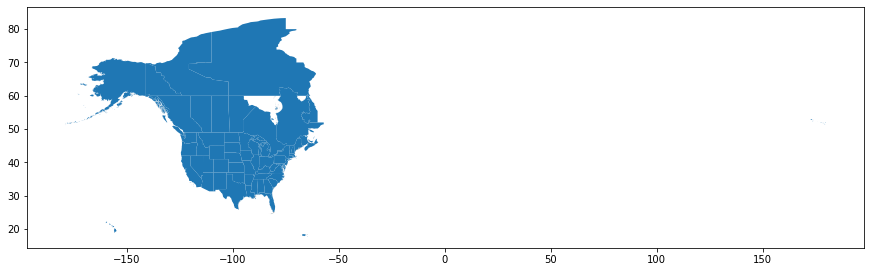

In [123]:
fig, ax = plt.subplots(figsize=(15, 15))
na_map.plot(ax=ax)

In [124]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(centro_chasmo_data['lng'], centro_chasmo_data['lat'])]

In [125]:
geo_df = gpd.GeoDataFrame(centro_chasmo_data, crs=crs, geometry=geometry)
geo_df.head()

,occurrence_no,record_type,reid_no,flags,collection_no,accepted_name,accepted_attr,accepted_rank,accepted_no,early_interval,late_interval,max_ma,min_ma,ref_author,ref_pubyr,reference_no,phylum,class,order,family,genus,plant_organ,plant_organ2,abund_value,abund_unit,lng,lat,collection_name,collection_subset,collection_aka,cc,state,county,latlng_basis,latlng_precision,geogscale,geogcomments,paleomodel,paleolng,paleolat,geoplate,cc.1,protected,formation,stratgroup,member,stratscale,zone,localsection,localbed,localorder,regionalsection,regionalbed,regionalorder,stratcomments,lithdescript,lithology1,lithadj1,lithification1,minor_lithology1,fossilsfrom1,lithology2,lithadj2,lithification2,minor_lithology2,fossilsfrom2,environment,tectonic_setting,geology_comments,assembl_comps,articulated_parts,associated_parts,common_body_parts,rare_body_parts,feed_pred_traces,artifacts,component_comments,pres_mode,preservation_quality,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,sorting,fragmentation,bioerosion,encrustation,preservation_comments,collection_type,collection_methods,museum,collection_coverage,collection_size,rock_censused,collectors,collection_dates,collection_comments,taxonomy_comments,taxon_environment,environment_basis,motility,life_habit,vision,diet,reproduction,ontogeny,composition,architecture,thickness,reinforcement,geometry
106988,139251,occ,NaN,NaN,11894,Centrosaurus,NaN,genus,38854,Late Campanian,NaN,83.5,70.6,Currie,2005.0,16964,Chordata,Ornithischia,NaN,Ceratopsidae,Centrosaurus,NaN,NaN,1,individuals,-111.528931,50.737297,RTMP Quarry 217,NaN,NaN,CA,Alberta,NaN,stated in text,6,small collection,NaN,gp_mid,-65.72,60.93,101,CA,NaN,Dinosaur Park,Belly River,NaN,bed,NaN,NaN,NaN,NaN,Dinosaur Park,4.03,NaN,NaN,NaN,not reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,terrestrial indet.,NaN,NaN,macrofossils,NaN,NaN,NaN,NaN,NaN,NaN,NaN,body,NaN,NaN,snapshot,NaN,dispersed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,general faunal/floral,"selective quarrying,mechanical,field collection",TMP,NaN,NaN,NaN,Routley,1994,NaN,NaN,terrestrial,NaN,actively mobile,ground dwelling,NaN,herbivore,"oviparous, dispersal=direct/internal,mobile","accretion,modification of parts",hydroxyapatite,compact or dense,NaN,NaN,POINT (-111.52893 50.73730)
113813,150310,occ,NaN,NaN,13340,Centrosaurus,NaN,genus,38854,Campanian,NaN,83.6,72.1,Brown,1917.0,5980,Chordata,Ornithischia,NaN,Ceratopsidae,Centrosaurus,NaN,NaN,1,specimens,-111.800003,50.730000,"north fork, Sand Creek (AMNH 5427)",NaN,Monoclonius cutleri type,CA,Alberta,NaN,based on political unit,2,small collection,"north fork of Sand Creek, 12 miles below Steve...",gp_mid,-65.90,60.75,101,CA,NaN,Oldman,Belly River,NaN,bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100 m below top of Belly River beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,terrestrial indet.,NaN,NaN,macrofossils,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"body,soft parts",excellent,NaN,snapshot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,taxonomic,"selective quarrying,mechanical,field collection",AMNH,NaN,1 individuals,NaN,B. Brown,1913,NaN,NaN,terrestrial,NaN,actively mobile,ground dwelling,NaN,herbivore,"oviparous, dispersal=direct/internal,mobile","accretion,modification of parts",hydroxyapatite,compact or dense,NaN,NaN,POINT (-111.80000 50.73000)
162780,220004,occ,NaN,NaN,22656,Chasmosaurus,NaN,genus,38855,Late Campanian,NaN,83.5,70.6,Behrensmeyer,1994.0,5923,Chordata,Ornithischia,NaN,Ceratopsidae,Chasmosaurus,NaN,NaN,NaN,NaN,-111.513893,50.734207,RTMP BB 47,NaN,"ETE Locality 1530, Bonebed 47",CA,Alberta,NaN,stated in text,6,outcrop,"LSD 10, sec 31, T20, R11, W 4th meridian, Dino...",gp_mid,-65.71,60.92,101,CA,NaN,Dinosaur Park,Belly River,NaN,bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ETE rock type adj: 0, ETE lithology comments: 0",sandstone,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,"""channel""",NaN,"ETE sed env 1: fluvial, ETE sed env 2: channel...",macrofossils,NaN,NaN,NaN,NaN,NaN,NaN,NaN,body,NaN,parautochthonous,snapshot,concentrate,-bonebed,NaN

<AxesSubplot:>

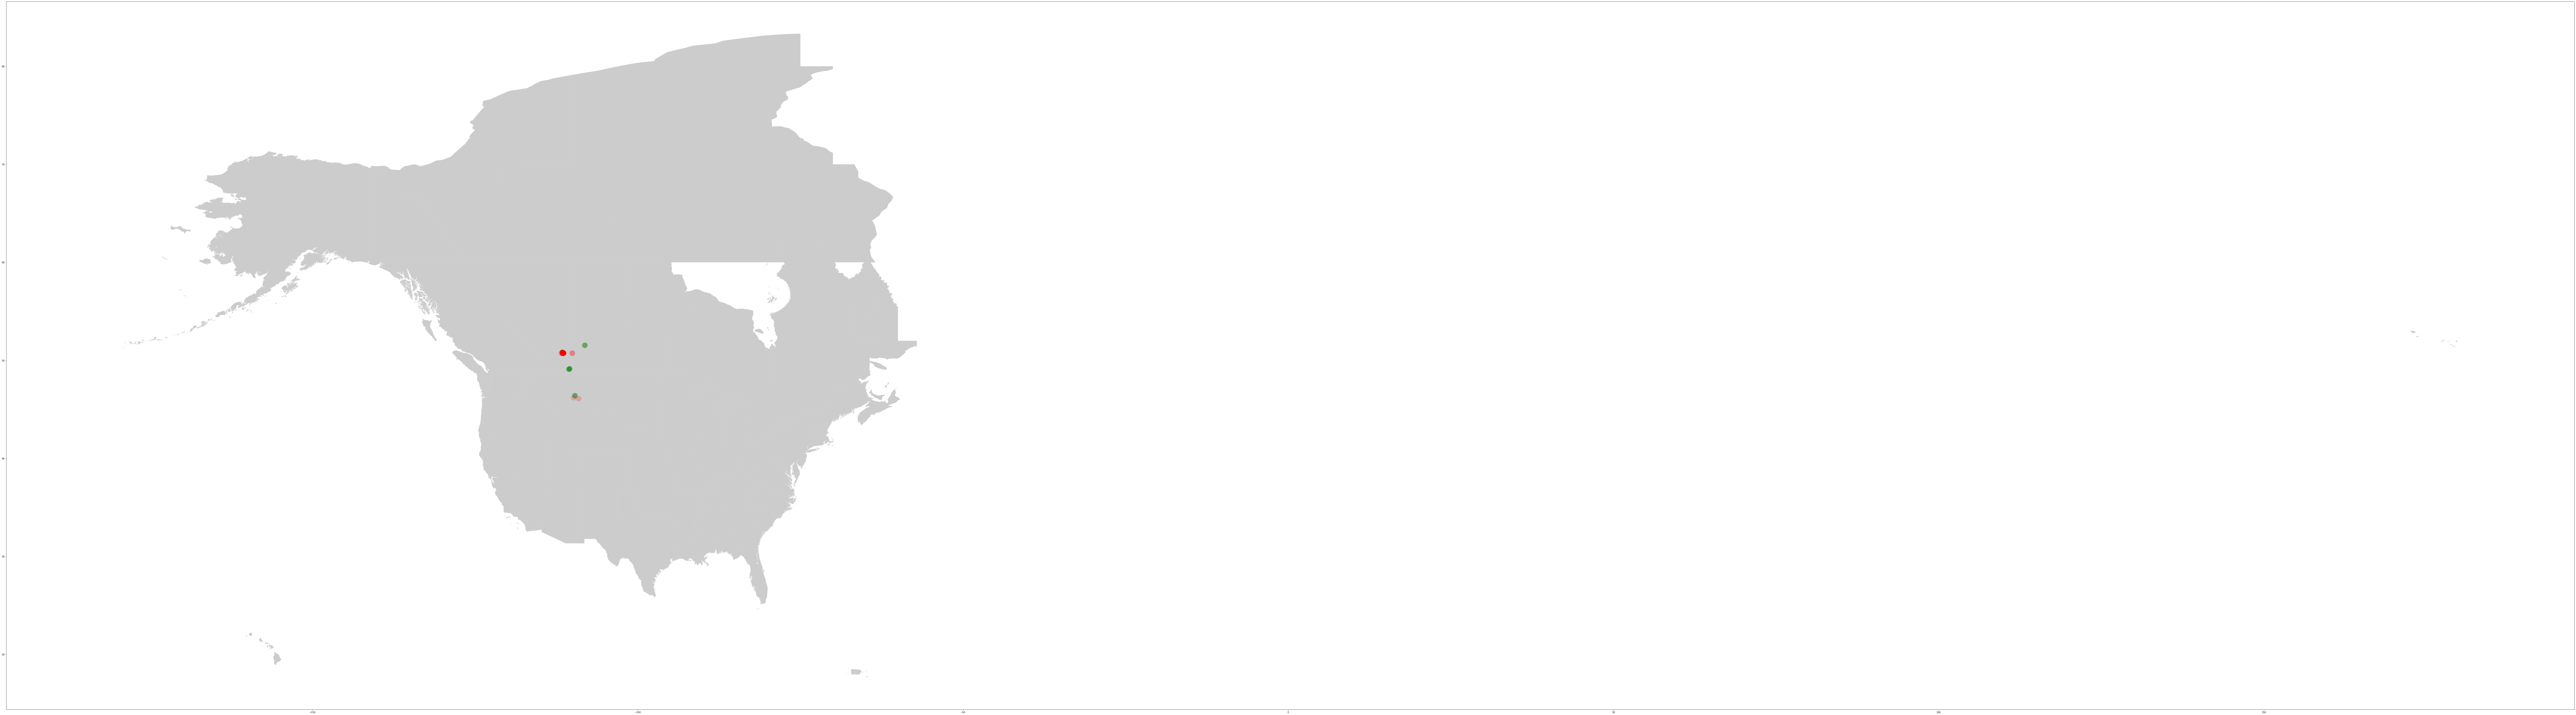

In [126]:
fig, ax = plt.subplots(figsize=(200, 200))
na_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['genus']=='Chasmosaurus'].plot(ax=ax, markersize=500, color='green', marker='o', alpha=0.5, label='Chasmosaurus')
geo_df[geo_df['genus']=='Centrosaurus'].plot(ax=ax, markersize=500, color='red', marker='o', alpha=0.2, label='Centrosaurus')

<AxesSubplot:>

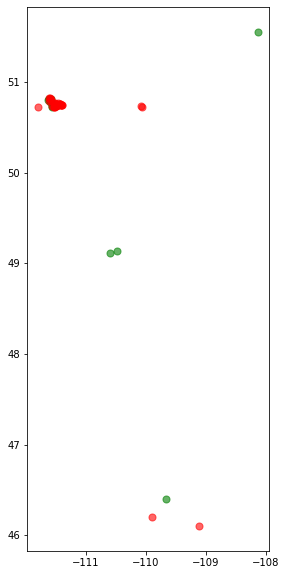

In [127]:
fig, ax = plt.subplots(figsize=(10, 10))
# na_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['genus']=='Chasmosaurus'].plot(ax=ax, markersize=50, color='green', marker='o', alpha=0.6, label='Chasmosaurus')
geo_df[geo_df['genus']=='Centrosaurus'].plot(ax=ax, markersize=50, color='red', marker='o', alpha=0.6, label='Centrosaurus')

# Exploration 2: Tyrannosauridae femur classification

In [128]:
dino_data.head()

,measurement_no,specimen_no,measurement_type,average,reid_no,is_type,specimen_part,identified_name,identified_no,difference,accepted_name_x,accepted_no,max_ma,min_ma,reference_no,accepted_name_y,class,order,family,genus,diet,_merge
0,26382,13134,length,0.137,19690,holotype,pubis,Futalognkosaurus dukei,109005,NaN,Futalognkosaurus dukei,109005,93.5,85.8,25429,Futalognkosaurus,Saurischia,NaN,NaN,Futalognkosaurus,herbivore,both
1,36186,18564,length,207.000,0,neither,femur,Coelophysis bauri,55477,NaN,Coelophysis bauri,54212,NaN,NaN,34423,Coelophysis,Saurischia,NaN,NaN,Coelophysis,carnivore,both
2,36187,18564,circumference,47.000,0,neither,femur,Coelophysis bauri,55477,NaN,Coelophysis bauri,54212,NaN,NaN,34423,Coelophysis,Saurischia,NaN,NaN,Coelophysis,carnivore,both
3,36188,18565,length,551.000,0,neither,femur,Dilophosaurus wetherilli,57251,NaN,Dilophosaurus wetherilli,55479,NaN,NaN,34423,Dilophosaurus,Saurischia,NaN,NaN,Dilophosaurus,carnivore,both
4,36189,18565,circumference,185.000,0,neither,femur,Dilophosaurus wetherilli,57251,NaN,Dilophosaurus wetherilli,55479,NaN,NaN,34423,Dilophosaurus,Saurischia,NaN,NaN,Dilophosaurus,carnivore,both


In [129]:
# select femur records

femurs = dino_data[dino_data['specimen_part']=='femur']
femurs.shape

(789, 22)

In [130]:
femurs.measurement_type.value_counts()

length           584
width            110
circumference     78
diameter          17
Name: measurement_type, dtype: int64

In [131]:
# convert circumference and diameter measures to width

def regularize_measurements(row):
    if row.measurement_type=='length':
        pass
    elif row.measurement_type=='width':
        pass
    elif row.measurement_type=='diameter':
        row.measurement_type = 'width'
    elif row.measurement_type=='circumference':
        row.measurement_type = 'width'
        row.average = row.average / math.pi
    return row

femurs = femurs.apply(lambda row: regularize_measurements(row), axis=1)
femurs.head()

,measurement_no,specimen_no,measurement_type,average,reid_no,is_type,specimen_part,identified_name,identified_no,difference,accepted_name_x,accepted_no,max_ma,min_ma,reference_no,accepted_name_y,class,order,family,genus,diet,_merge
1,36186,18564,length,207.000000,0,neither,femur,Coelophysis bauri,55477,NaN,Coelophysis bauri,54212,NaN,NaN,34423,Coelophysis,Saurischia,NaN,NaN,Coelophysis,carnivore,both
2,36187,18564,width,14.960565,0,neither,femur,Coelophysis bauri,55477,NaN,Coelophysis bauri,54212,NaN,NaN,34423,Coelophysis,Saurischia,NaN,NaN,Coelophysis,carnivore,both
3,36188,18565,length,551.000000,0,neither,femur,Dilophosaurus wetherilli,57251,NaN,Dilophosaurus wetherilli,55479,NaN,NaN,34423,Dilophosaurus,Saurischia,NaN,NaN,Dilophosaurus,carnivore,both
4,36189,18565,width,58.887329,0,neither,femur,Dilophosaurus wetherilli,57251,NaN,Dilophosaurus wetherilli,55479,NaN,NaN,34423,Dilophosaurus,Saurischia,NaN,NaN,Dilophosaurus,carnivore,both
9,36194,18568,length,519.000000,0,neither,femur,Elaphrosaurus bambergi,55481,NaN,Elaphrosaurus bambergi,55481,155.7,150.8,34423,Elaphrosaurus,Saurischia,NaN,NaN,Elaphrosaurus,carnivore,both


In [132]:
# get records for femur length, width, taxa

femur_dict = {}

for index, row in femurs.iterrows():
    if row.specimen_no not in femur_dict.keys():
        femur_dict[row.specimen_no] = {row.measurement_type: row.average, 'genus': row.genus, 'family': row.family}
    else:
        femur_dict[row.specimen_no][row.measurement_type] = row.average

In [133]:
# initialize dataframe

femur_df = pd.DataFrame(columns=['length', 'width', 'family', 'genus'])

for specimen in femur_dict.keys():
    for attribute in femur_dict[specimen].keys():
        femur_df[attribute] = None

femur_df.head()

,length,width,family,genus


In [134]:
# add rows from dictionary

def update_row(df, dict):
    for gena in dict.keys():
        df.loc[gena, dict[gena].keys()] = dict[gena].values()

update_row(femur_df, femur_dict)
femur_df.head()

,length,width,family,genus
18564,207.0,14.960565,NaN,Coelophysis
18565,551.0,58.887329,NaN,Dilophosaurus
18568,519.0,52.521131,NaN,Elaphrosaurus
18570,874.0,93.264797,Allosauridae,Allosaurus
18573,981.0,119.366207,Allosauridae,Allosaurus


In [135]:
femur_df.shape

(600, 4)

In [136]:
femur_df.isna().sum()

length     16
width     420
family    186
genus       0
dtype: int64

In [137]:
# drop rows with missing length/width info

femur_df = femur_df[~femur_df.width.isna()]
femur_df = femur_df[~femur_df.length.isna()]
femur_df.isna().sum()

length     0
width      0
family    58
genus      0
dtype: int64

In [138]:
femur_df.groupby('family')['genus'].value_counts()

family                 genus             
Allosauridae           Allosaurus            8
Ankylosauridae         Ankylosaurus          2
                       Gobisaurus            1
                       Scolosaurus           1
Brachiosauridae        Giraffatitan          1
                       Lusotitan             1
Caenagnathidae         Gigantoraptor         1
                       Microvenator          1
Carcharodontosauridae  Acrocanthosaurus      2
                       Mapusaurus            1
                       Tyrannotitan          1
Ceratopsidae           Agujaceratops         1
                       Pentaceratops         1
                       Titanoceratops        1
Compsognathidae        Aniksosaurus          5
Dicraeosauridae        Amargasaurus          1
Diplodocidae           Diplodocus            3
                       Brontosaurus          2
                       Tornieria             2
                       Barosaurus            1
                  

In [139]:
tyranos = femur_df[femur_df['family']=="Tyrannosauridae"]
tyranos

,length,width,family,genus
18627,654.0,59.842259,Tyrannosauridae,Gorgosaurus
18630,893.0,91.354937,Tyrannosauridae,Gorgosaurus
18633,905.0,94.856346,Tyrannosauridae,Gorgosaurus
18636,781.0,76.712683,Tyrannosauridae,Gorgosaurus
18640,854.0,99.312684,Tyrannosauridae,Tarbosaurus
18643,771.0,89.445078,Tyrannosauridae,Tarbosaurus
18646,1289.0,158.200013,Tyrannosauridae,Tyrannosaurus
18649,1273.0,171.887339,Tyrannosauridae,Tyrannosaurus
18652,1006.0,123.822546,Tyrannosauridae,Daspletosaurus
18838,1300.0,180.0,Tyrannosauridae,Tyrannosaurus


<AxesSubplot:xlabel='width', ylabel='length'>

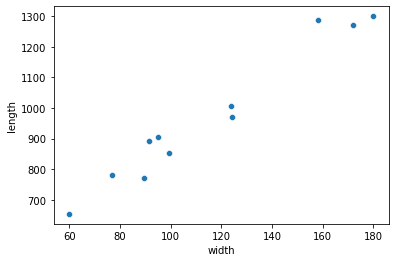

In [140]:
sns.scatterplot(data=tyranos, x='width', y='length')

In [141]:
print('There are ' + str(tyranos['family'].nunique()) + ' unique families')
print('There are ' + str(tyranos['genus'].nunique())+ ' unique genera')

There are 1 unique families
There are 4 unique genera


<AxesSubplot:xlabel='width', ylabel='length'>

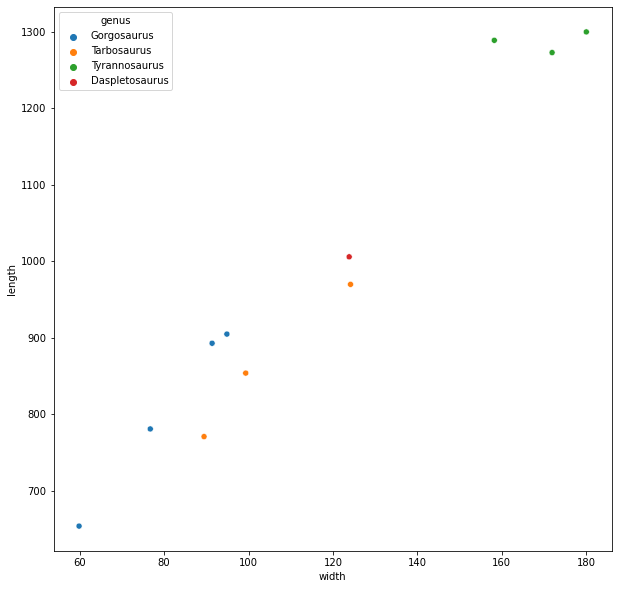

In [142]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=tyranos, x='width', y='length', hue='genus')

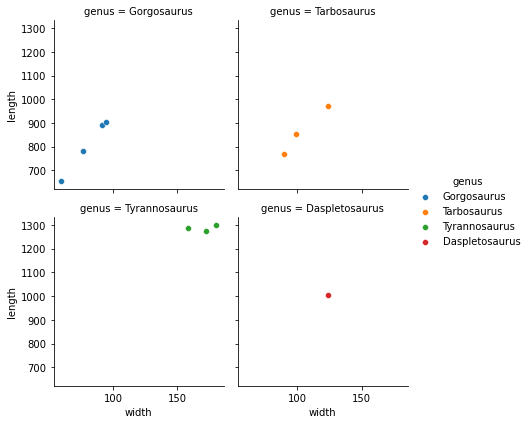

In [143]:
grid = sns.FacetGrid(tyranos, col='genus', hue='genus', col_wrap=2)
grid.map(sns.scatterplot, 'width', 'length')
grid.add_legend()

In [144]:
tyrano_clusters = tyranos.drop(['family', 'genus'], axis=1)

Text(0, 0.5, 'Inertia')

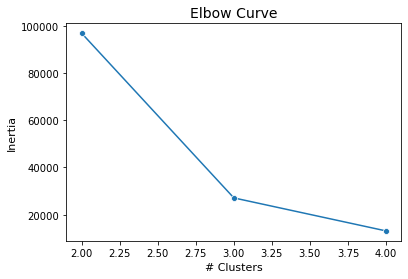

In [145]:
# elbow curve

num_clusters = list(range(2, 5))

cost_values = []

for k in num_clusters:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_predict(tyrano_clusters)
    cost_values.append(km.inertia_)

ax = sns.lineplot(x=num_clusters, y=cost_values, marker='o')
ax.set_title('Elbow Curve', fontsize=14)
ax.set_xlabel('# Clusters', fontsize=11)
ax.set_ylabel('Inertia', fontsize=11)

In [146]:
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(tyrano_clusters)

array([1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2], dtype=int32)

In [147]:
tyranos['cluster'] = km.fit_predict(tyrano_clusters)

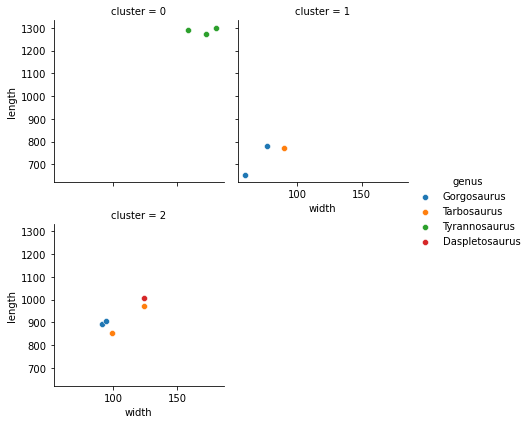

In [148]:
grid = sns.FacetGrid(tyranos, col='cluster', hue='genus', col_wrap=2)
grid.map(sns.scatterplot, 'width', 'length')
grid.add_legend()

## Map tyrannosaurs

# Exploration 3: Skull Classification

In [149]:
dino_data.head()

,measurement_no,specimen_no,measurement_type,average,reid_no,is_type,specimen_part,identified_name,identified_no,difference,accepted_name_x,accepted_no,max_ma,min_ma,reference_no,accepted_name_y,class,order,family,genus,diet,_merge
0,26382,13134,length,0.137,19690,holotype,pubis,Futalognkosaurus dukei,109005,NaN,Futalognkosaurus dukei,109005,93.5,85.8,25429,Futalognkosaurus,Saurischia,NaN,NaN,Futalognkosaurus,herbivore,both
1,36186,18564,length,207.000,0,neither,femur,Coelophysis bauri,55477,NaN,Coelophysis bauri,54212,NaN,NaN,34423,Coelophysis,Saurischia,NaN,NaN,Coelophysis,carnivore,both
2,36187,18564,circumference,47.000,0,neither,femur,Coelophysis bauri,55477,NaN,Coelophysis bauri,54212,NaN,NaN,34423,Coelophysis,Saurischia,NaN,NaN,Coelophysis,carnivore,both
3,36188,18565,length,551.000,0,neither,femur,Dilophosaurus wetherilli,57251,NaN,Dilophosaurus wetherilli,55479,NaN,NaN,34423,Dilophosaurus,Saurischia,NaN,NaN,Dilophosaurus,carnivore,both
4,36189,18565,circumference,185.000,0,neither,femur,Dilophosaurus wetherilli,57251,NaN,Dilophosaurus wetherilli,55479,NaN,NaN,34423,Dilophosaurus,Saurischia,NaN,NaN,Dilophosaurus,carnivore,both


In [150]:
# select skull records

skulls = dino_data[dino_data['specimen_part']=='skull']
skulls.shape

(201, 22)

In [151]:
skulls.measurement_type.value_counts()

length    178
width      20
height      3
Name: measurement_type, dtype: int64

In [152]:
skulls = skulls[skulls['measurement_type']=='length']

In [153]:
skulls.genus.value_counts()

Coelophysis           13
Gallimimus             6
Gorgosaurus            6
Psittacosaurus         5
Gryposaurus            5
Ankylosaurus           3
Sinosauropteryx        3
Yutyrannus             3
Dilophosaurus          2
Tyrannosaurus          2
Arenysaurus            2
Pentaceratops          2
Sinornithosaurus       2
Caudipteryx            2
Alioramus              2
Herrerasaurus          2
Sinraptor              2
Yangchuanosaurus       2
Dilong                 2
Deinonychus            2
Sinusonasus            1
Sinovenator            1
Mei                    1
Linhevenator           1
Atrociraptor           1
Zanabazar              1
Ornithoides            1
Sciurumimus            1
Bambiraptor            1
Linheraptor            1
Tsaagan                1
Microraptor            1
Bellusaurus            1
Xiaotingia             1
Buitreraptor           1
Archaeornithoides      1
Heyuannia              1
Khaan                  1
Conchoraptor           1
Fenestrosaurus         1
